In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("../csv_files/stories_data_final.csv")

# Overview

In [ ]:
df.head()

In [10]:
df.columns

Index(['ID', 'Description', 'depth', 'story_tags_list', 'cover_img', 'title',
       'Lượt đọc', 'Lượt bình chọn', 'Chương', 'recommended_stories', 'badges',
       'Thời gian'],
      dtype='object')

# Null data

In [52]:
null_samples = []

for column in df.columns:
    print(f"Null samples of column {column}: {len(df.loc[df[column].isnull()])}")
    null_samples.append(100.0 * float(len(df.loc[df[column].isnull()])) / float(len(df)))

Null samples of column ID: 0
Null samples of column Description: 24
Null samples of column depth: 0
Null samples of column story_tags_list: 25
Null samples of column cover_img: 54
Null samples of column title: 57
Null samples of column Lượt đọc: 227
Null samples of column Lượt bình chọn: 278
Null samples of column Chương: 338
Null samples of column recommended_stories: 1897
Null samples of column badges: 289
Null samples of column Thời gian: 1502


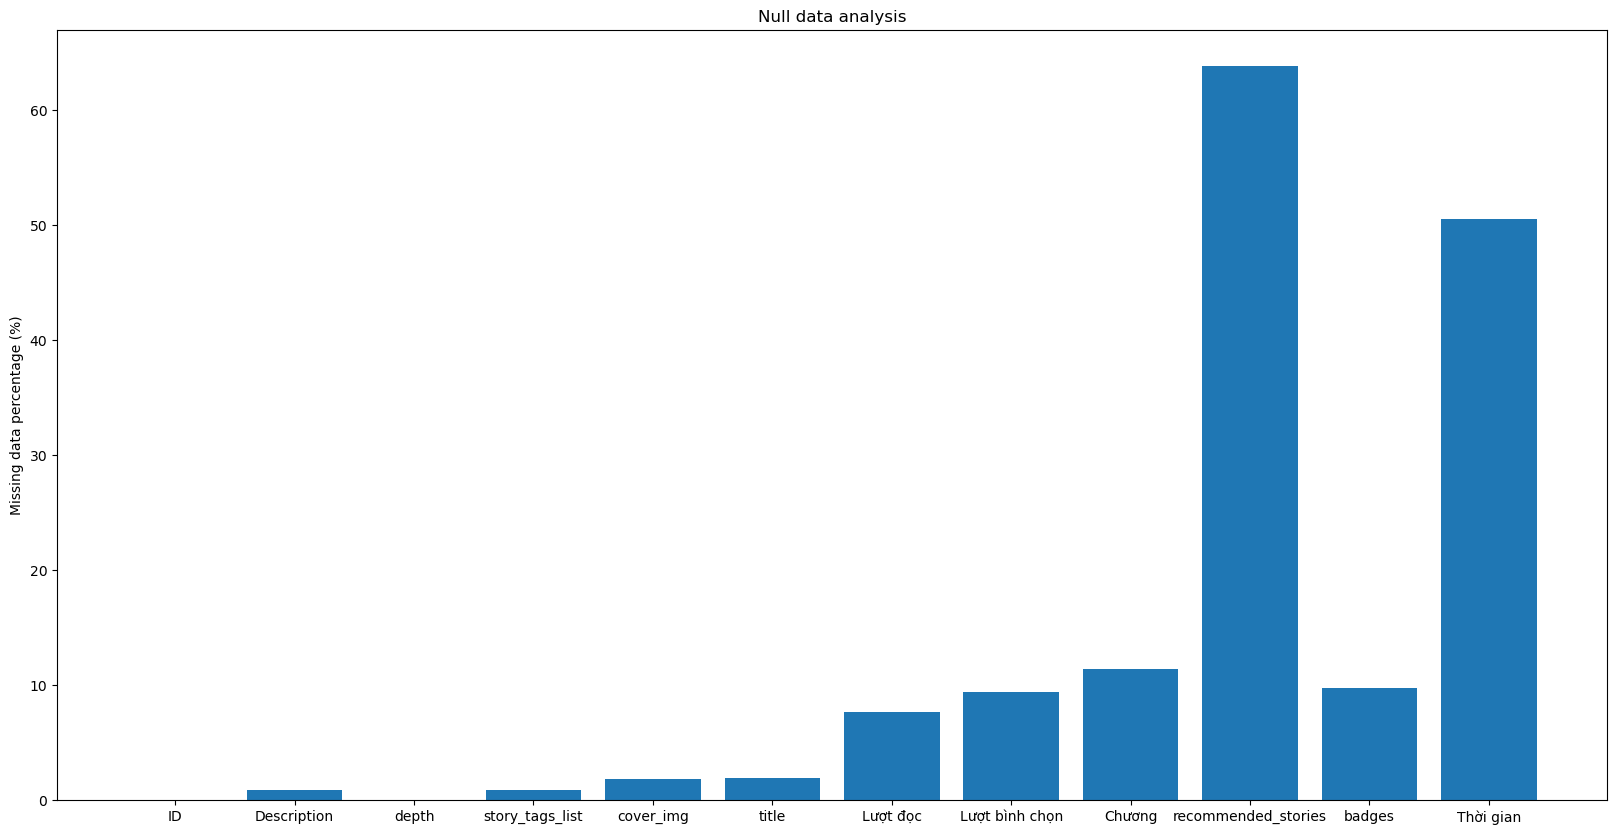

In [54]:
plt.figure(figsize=(20, 10)) 
plt.bar(df.columns, null_samples)
plt.title("Null data analysis")
plt.ylabel("Missing data percentage (%)")
plt.show()

# Depth

In [ ]:
df["depth"].value_counts().plot(kind="bar")

# Story tags

In [121]:
def str_to_tags(string):
    return string[2:-2].split("', '")

In [5]:
tags_list = {}

for i in range(len(df)):
    tags = df.at[i, "story_tags_list"]
   
    if type(tags) == type(np.nan):
        continue
    
    #print(type(str_to_tags(tags)))
    #print(str_to_tags(tags))
    
    for tag in str_to_tags(tags):
        if tag in tags_list:
            tags_list[tag] += 1
        else:
            tags_list[tag] = 1
            

In [49]:
tags_freq = Counter(tags_list.values())

myKeys = list(tags_freq.keys())
myKeys.sort()
sorted_tags_freq = {i: tags_freq[i] for i in myKeys}

print("{")
for key in sorted_tags_freq.keys():
    print(f"{key}: {sorted_tags_freq[key]}, ", end="")
print("}")

{
1: 7686, 2: 1433, 3: 566, 4: 372, 5: 206, 6: 133, 7: 113, 8: 96, 9: 50, 10: 65, 11: 58, 12: 36, 13: 31, 14: 30, 15: 21, 16: 13, 17: 17, 18: 13, 19: 16, 20: 18, 21: 14, 22: 11, 23: 12, 24: 8, 25: 6, 26: 5, 27: 5, 28: 6, 29: 9, 30: 6, 31: 6, 32: 10, 33: 10, 34: 3, 35: 9, 36: 4, 37: 3, 38: 5, 39: 3, 40: 3, 41: 4, 42: 1, 43: 2, 44: 3, 45: 3, 46: 4, 47: 5, 48: 3, 49: 1, 50: 4, 51: 3, 52: 3, 53: 3, 54: 2, 55: 1, 56: 3, 57: 1, 59: 1, 61: 2, 62: 2, 63: 1, 64: 2, 66: 2, 68: 1, 69: 1, 70: 3, 71: 1, 72: 3, 73: 1, 74: 1, 75: 1, 78: 1, 79: 2, 81: 3, 82: 1, 84: 2, 85: 1, 90: 1, 91: 2, 92: 2, 93: 2, 99: 1, 100: 1, 102: 1, 106: 1, 107: 2, 110: 2, 111: 1, 115: 1, 123: 2, 128: 1, 136: 1, 140: 1, 145: 1, 147: 1, 155: 1, 161: 1, 163: 1, 173: 1, 231: 1, 276: 1, 441: 1, 551: 1, }


<BarContainer object of 103 artists>

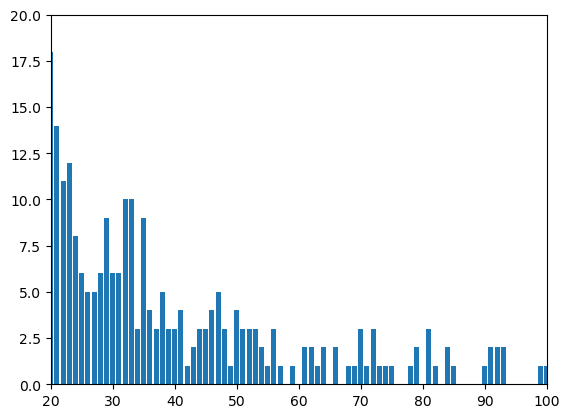

In [46]:
plt.xlim(20, 100)
plt.ylim(0, 20)
plt.bar(tags_freq.keys(), tags_freq.values())

# Title

In [12]:
length_of_title = []

for i in range(len(df)):
    title = df.at[i, "title"]
    
    if type(title) == type(np.nan):
        continue
        
    length_of_title.append(len(title))

In [18]:
frequency_count = Counter(length_of_title)

In [19]:
x_values = list(frequency_count.keys())
y_values = list(frequency_count.values())

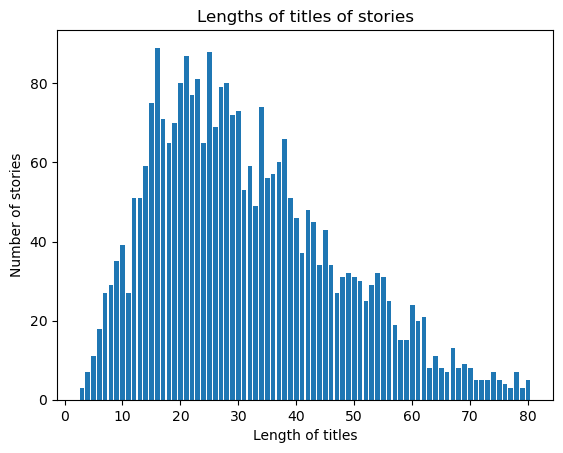

In [51]:
plt.bar(x_values, y_values)
plt.title("Lengths of titles of stories")
plt.xlabel("Length of titles")
plt.ylabel("Number of stories")
plt.show()

# Lượt đọc

In [ ]:
df_not_null = df.loc[(df["Lượt đọc"].isnull() == False) & (df["Lượt bình chọn"].isnull() == False)]

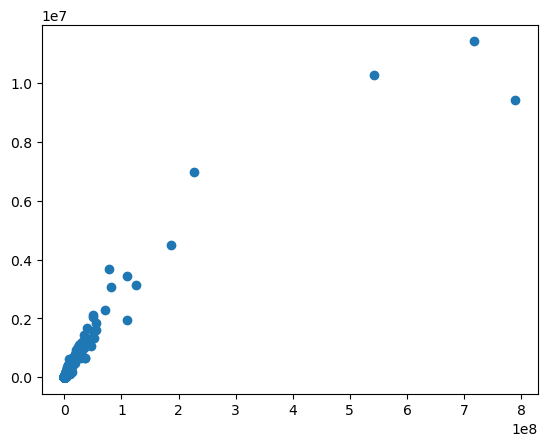

In [135]:
plt.scatter(df_not_null["Lượt đọc"].values, df_not_null["Lượt bình chọn"])
#plt.ylim(0, 10000)
#plt.xlim(0, 100000)

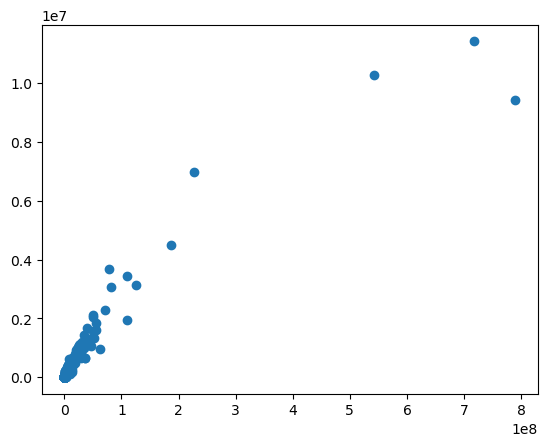

In [136]:
plt.scatter(df["Lượt đọc"].values, df["Lượt bình chọn"])
#plt.ylim(0, 10000)
#plt.xlim(0, 100000)

In [4]:
reg = linear_model.Ridge(alpha=.5)

In [13]:
not_null = df.loc[(df["Lượt đọc"].isnull() == False) & (df["Lượt bình chọn"].isnull() == False)]

In [58]:
y = not_null["Lượt đọc"].values
x = not_null["Lượt bình chọn"].values.reshape(-1, 1)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

In [59]:
reg.fit(x_train, y_train)

Ridge(alpha=102)

In [60]:
reg.coef_[0]

53.6788438352882

In [61]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [62]:
#plt.scatter(x_val.reshape(-1), y_val)
#abline(reg.coef_[0], reg.intercept_)
#plt.ylim(-1e3, .5 * 1e6)
#plt.xlim(-1e3, 1.3*1e7)

In [63]:
loss = mean_squared_error(y_val, reg.predict(x_val))

In [64]:
loss

22831135554618.39

In [66]:
step = .05
max_alpha = 1
min_alpha = 0

loss_list = []

for i in np.arange(min_alpha, max_alpha+step, step):
    model = linear_model.Ridge(alpha = i)
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    
    #print(y_val_pred)
    
    loss = mean_squared_error(y_val, y_val_pred)
    
    loss_list.append(loss)

In [67]:
loss_list

[22831135554636.504,
 22831135554636.48,
 22831135554636.48,
 22831135554636.48,
 22831135554636.48,
 22831135554636.445,
 22831135554636.445,
 22831135554636.406,
 22831135554636.406,
 22831135554636.406,
 22831135554636.406,
 22831135554636.375,
 22831135554636.375,
 22831135554636.375,
 22831135554636.375,
 22831135554636.36,
 22831135554636.36,
 22831135554636.324,
 22831135554636.324,
 22831135554636.324,
 22831135554636.324]

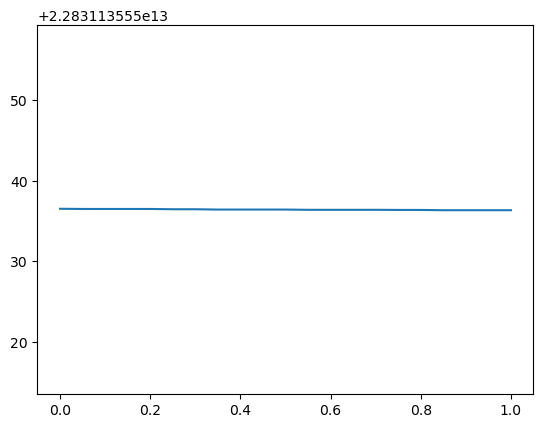

In [68]:
plt.plot(np.arange(0, max_alpha+step, step), loss_list)

# Chương + Thời gian

[Text(0, 0, '1.0'),
 Text(20, 0, '21.0'),
 Text(40, 0, '41.0'),
 Text(60, 0, '61.0'),
 Text(80, 0, '81.0'),
 Text(100, 0, '101.0'),
 Text(120, 0, '121.0'),
 Text(140, 0, '141.0'),
 Text(160, 0, '164.0'),
 Text(180, 0, '189.0')]

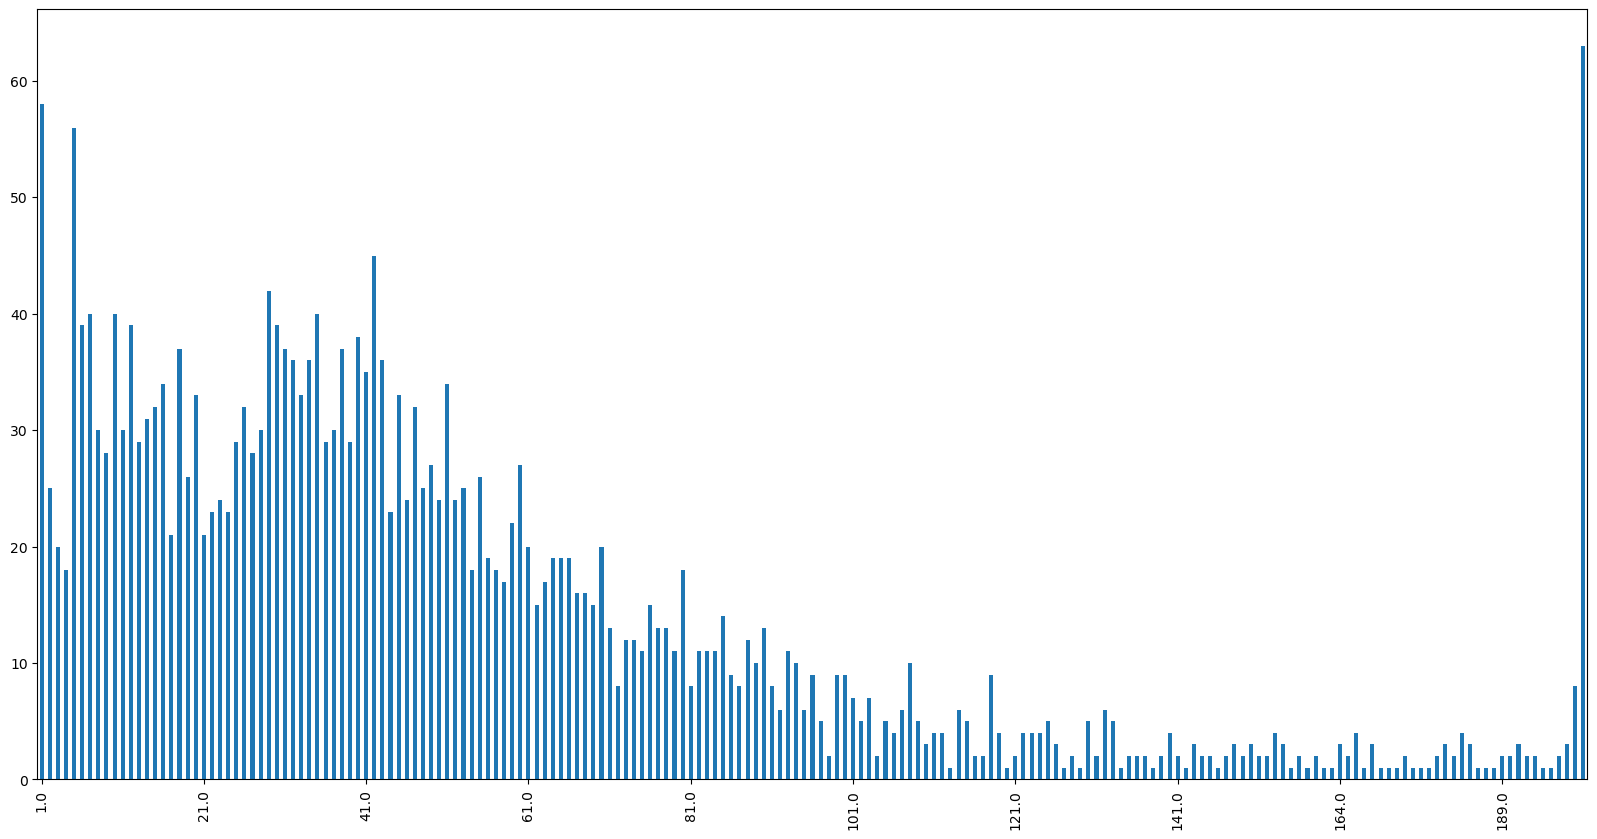

In [77]:
value_counts_sorted = df['Chương'].value_counts().sort_index()

ax = value_counts_sorted.plot(kind="bar", figsize=(20, 10))
# Set the x-axis ticks to specific numbers
ax.set_xticks(range(len(value_counts_sorted.index))[::20])  # Adjust 2 for the step

# Set the tick labels
ax.set_xticklabels(value_counts_sorted.index[::20])

In [130]:
df_not_null = df.loc[(df["Chương"].isnull() == False) & (df["Thời gian"].isnull() == False)]

Text(0, 0.5, 'Thời gian (phút)')

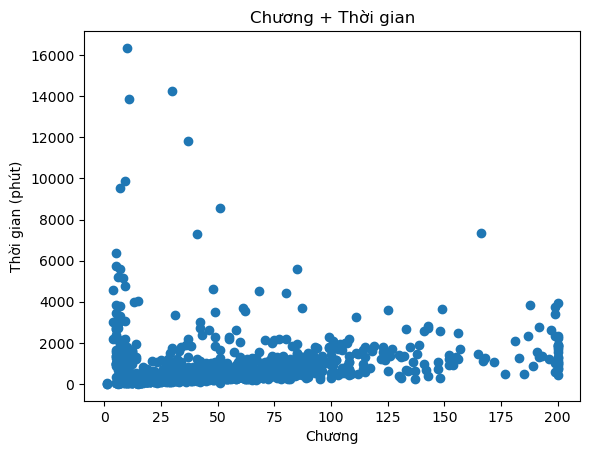

In [137]:
plt.scatter(df_not_null["Chương"].values, df_not_null["Thời gian"].values)
plt.title("Chương + Thời gian")
plt.xlabel("Chương")
plt.ylabel("Thời gian (phút)")

# Badges

In [78]:
def str_to_badges(string):
    return string[2:-2].split("', '")

In [80]:
badges_list = {}

for i in range(len(df)):
    badges = df.at[i, "badges"]
   
    if type(badges) == type(np.nan):
        continue
    
    #print(type(str_to_tags(tags)))
    #print(str_to_tags(tags))
    
    for badge in str_to_badges(badges):
        if badge in badges_list:
            badges_list[badge] += 1
        else:
            badges_list[badge] = 1

In [81]:
badges_list

{'Trưởng thành': 282, 'Hoàn thành': 1713, 'Đang sáng tác': 973}

# Recommended stories

In [88]:
def str_to_stories(string):
    return string[2:-2].split("', '")

In [92]:
rec_dict = {}

for i in range(len(df)):
    stories = df.at[i, "recommended_stories"]
    
    if type(stories) == type(np.nan):
        continue
        
    for story in str_to_stories(stories):
        if len(story) < 1:
            print(i)
            continue
        
        if story in rec_dict:
            rec_dict[story] += 1
        else:
            rec_dict[story] = 1

524
548
617


In [93]:
df.at[524, "recommended_stories"]

'[]'

In [94]:
rec_dict

{'0300': 19,
 '0028': 21,
 '0024': 21,
 '0021': 21,
 '0025': 7,
 '0029': 21,
 '0023': 21,
 '0027': 21,
 '0301': 19,
 '0022': 21,
 '0026': 21,
 '0020': 7,
 '0036': 39,
 '0038': 39,
 '0032': 39,
 '0303': 35,
 '0031': 39,
 '0033': 39,
 '0035': 17,
 '2975': 1,
 '0034': 39,
 '0039': 39,
 '0302': 36,
 '0037': 17,
 '0030': 39,
 '0048': 30,
 '0043': 30,
 '0045': 30,
 '0049': 30,
 '0040': 30,
 '0046': 30,
 '0041': 30,
 '0047': 30,
 '0042': 30,
 '0044': 30,
 '0055': 34,
 '0056': 34,
 '0051': 34,
 '0052': 34,
 '0053': 34,
 '0057': 34,
 '0054': 34,
 '0058': 34,
 '0050': 34,
 '0059': 34,
 '0060': 2,
 '0068': 1,
 '0063': 5,
 '1546': 2,
 '0066': 1,
 '0067': 2,
 '0064': 2,
 '0062': 1,
 '0061': 3,
 '0825': 3,
 '1615': 1,
 '0309': 4,
 '0090': 8,
 '0065': 6,
 '0069': 69,
 '0077': 7,
 '0076': 6,
 '0074': 68,
 '0073': 68,
 '0304': 66,
 '0070': 68,
 '0071': 67,
 '0072': 6,
 '0078': 69,
 '0305': 66,
 '0306': 66,
 '0075': 69,
 '0086': 25,
 '0082': 32,
 '0087': 33,
 '0081': 9,
 '0088': 33,
 '0307': 29,
 '0085'

In [95]:
sorted_dict = dict(sorted(rec_dict.items()))

sorted_dict

{'0019': 1,
 '0020': 7,
 '0021': 21,
 '0022': 21,
 '0023': 21,
 '0024': 21,
 '0025': 7,
 '0026': 21,
 '0027': 21,
 '0028': 21,
 '0029': 21,
 '0030': 39,
 '0031': 39,
 '0032': 39,
 '0033': 39,
 '0034': 39,
 '0035': 17,
 '0036': 39,
 '0037': 17,
 '0038': 39,
 '0039': 39,
 '0040': 30,
 '0041': 30,
 '0042': 30,
 '0043': 30,
 '0044': 30,
 '0045': 30,
 '0046': 30,
 '0047': 30,
 '0048': 30,
 '0049': 30,
 '0050': 34,
 '0051': 34,
 '0052': 34,
 '0053': 34,
 '0054': 34,
 '0055': 34,
 '0056': 34,
 '0057': 34,
 '0058': 34,
 '0059': 34,
 '0060': 2,
 '0061': 3,
 '0062': 1,
 '0063': 5,
 '0064': 2,
 '0065': 6,
 '0066': 1,
 '0067': 2,
 '0068': 1,
 '0069': 69,
 '0070': 68,
 '0071': 67,
 '0072': 6,
 '0073': 68,
 '0074': 68,
 '0075': 69,
 '0076': 6,
 '0077': 7,
 '0078': 69,
 '0079': 9,
 '0080': 32,
 '0081': 9,
 '0082': 32,
 '0083': 32,
 '0084': 33,
 '0085': 32,
 '0086': 25,
 '0087': 33,
 '0088': 33,
 '0089': 4,
 '0090': 8,
 '0091': 2,
 '0092': 3,
 '0093': 6,
 '0094': 6,
 '0095': 2,
 '0096': 3,
 '0097': 2,

{'whiskers': [<matplotlib.lines.Line2D at 0x1f2763caeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f275bbd850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2763caac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f275bbdfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f275bbd370>],
 'means': []}

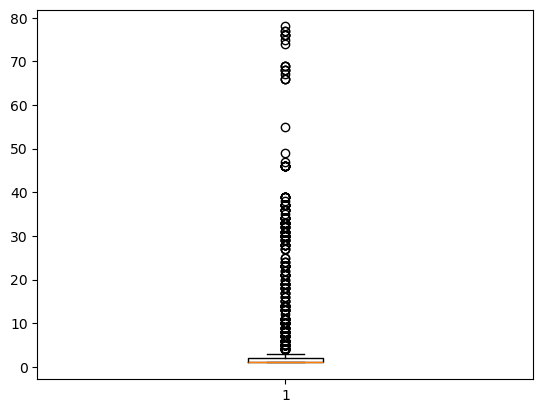

In [97]:
plt.boxplot(sorted_dict.values())

In [99]:
q75_dict = {key: value for key, value in rec_dict.items() if value >= np.percentile(list(rec_dict.values()), 75)}

In [102]:
np.percentile(list(q75_dict.values()), 75)

15.0

In [103]:
q7575_dict = {key: value for key, value in rec_dict.items() if value >= np.percentile(list(q75_dict.values()), 75)}

{'whiskers': [<matplotlib.lines.Line2D at 0x1f2795a1e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1f2795af3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2795a1b80>],
 'medians': [<matplotlib.lines.Line2D at 0x1f2795af910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f2795afbb0>],
 'means': []}

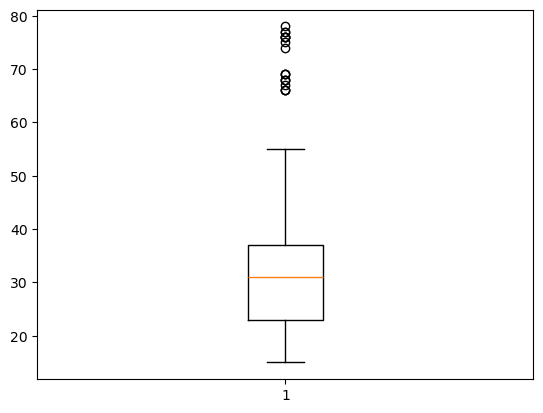

In [104]:
plt.boxplot(q7575_dict.values())

In [105]:
q7575_dict

{'0300': 19,
 '0028': 21,
 '0024': 21,
 '0021': 21,
 '0029': 21,
 '0023': 21,
 '0027': 21,
 '0301': 19,
 '0022': 21,
 '0026': 21,
 '0036': 39,
 '0038': 39,
 '0032': 39,
 '0303': 35,
 '0031': 39,
 '0033': 39,
 '0035': 17,
 '0034': 39,
 '0039': 39,
 '0302': 36,
 '0037': 17,
 '0030': 39,
 '0048': 30,
 '0043': 30,
 '0045': 30,
 '0049': 30,
 '0040': 30,
 '0046': 30,
 '0041': 30,
 '0047': 30,
 '0042': 30,
 '0044': 30,
 '0055': 34,
 '0056': 34,
 '0051': 34,
 '0052': 34,
 '0053': 34,
 '0057': 34,
 '0054': 34,
 '0058': 34,
 '0050': 34,
 '0059': 34,
 '0069': 69,
 '0074': 68,
 '0073': 68,
 '0304': 66,
 '0070': 68,
 '0071': 67,
 '0078': 69,
 '0305': 66,
 '0306': 66,
 '0075': 69,
 '0086': 25,
 '0082': 32,
 '0087': 33,
 '0088': 33,
 '0307': 29,
 '0085': 32,
 '0080': 32,
 '0083': 32,
 '0084': 33,
 '0308': 29,
 '1618': 46,
 '1623': 46,
 '1616': 46,
 '0316': 15,
 '1621': 46,
 '1624': 46,
 '0317': 16,
 '1625': 46,
 '0311': 15,
 '1617': 46,
 '1622': 46,
 '1619': 46,
 '1620': 46,
 '0313': 19,
 '0104': 22,

In [108]:
list(q7575_dict.keys())

['0300',
 '0028',
 '0024',
 '0021',
 '0029',
 '0023',
 '0027',
 '0301',
 '0022',
 '0026',
 '0036',
 '0038',
 '0032',
 '0303',
 '0031',
 '0033',
 '0035',
 '0034',
 '0039',
 '0302',
 '0037',
 '0030',
 '0048',
 '0043',
 '0045',
 '0049',
 '0040',
 '0046',
 '0041',
 '0047',
 '0042',
 '0044',
 '0055',
 '0056',
 '0051',
 '0052',
 '0053',
 '0057',
 '0054',
 '0058',
 '0050',
 '0059',
 '0069',
 '0074',
 '0073',
 '0304',
 '0070',
 '0071',
 '0078',
 '0305',
 '0306',
 '0075',
 '0086',
 '0082',
 '0087',
 '0088',
 '0307',
 '0085',
 '0080',
 '0083',
 '0084',
 '0308',
 '1618',
 '1623',
 '1616',
 '0316',
 '1621',
 '1624',
 '0317',
 '1625',
 '0311',
 '1617',
 '1622',
 '1619',
 '1620',
 '0313',
 '0104',
 '0235',
 '0101',
 '0100',
 '0106',
 '0105',
 '0099',
 '0107',
 '0102',
 '0141',
 '0201',
 '0321',
 '0202',
 '0323',
 '0319',
 '0322',
 '0205',
 '0197',
 '0200',
 '0203',
 '0232',
 '0135',
 '0329',
 '0523',
 '0336',
 '0394',
 '0400',
 '0398',
 '0397',
 '0404',
 '0399',
 '0294',
 '0391',
 '0269',
 '0262',
 

In [109]:
df['ID_04d'] = df['ID'].apply(lambda x: '{:04d}'.format(x))

In [119]:
df_most_rec = df.loc[df["ID_04d"].isin(list(q7575_dict.keys()))].reset_index().drop(["index"], axis=1)

In [122]:
tags_list = {}

for i in range(len(df_most_rec)):
    tags = df_most_rec.at[i, "story_tags_list"]
   
    if type(tags) == type(np.nan):
        continue
    
    #print(type(str_to_tags(tags)))
    #print(str_to_tags(tags))
    
    for tag in str_to_tags(tags):
        if tag in tags_list:
            tags_list[tag] += 1
        else:
            tags_list[tag] = 1
            

In [123]:
tags_list

{'macàrồng': 4,
 'heejake': 1,
 'niki': 1,
 'jaywon': 1,
 'taehyun': 2,
 'sunoo': 1,
 'originalcharacter': 1,
 'sunsun': 1,
 'yeongyu': 1,
 'enhypen': 1,
 'sunghoon': 1,
 'h-e': 2,
 'miminie': 1,
 'a3manga': 1,
 'ngontinh': 10,
 'sung': 7,
 'nguoc': 5,
 'choiyeonjun': 1,
 'kangtaehyun': 1,
 'soft': 1,
 'yeonjun': 1,
 'taegyu': 1,
 'họcđường': 3,
 'soobin': 1,
 'choisoobin': 1,
 'hueningkai': 1,
 'soojun': 1,
 'fanfic': 3,
 'beomgyu': 1,
 'vampire': 4,
 'txt': 1,
 'tomorrow×together': 1,
 'choibeomgyu': 1,
 'tubatu': 1,
 'fanfiction': 9,
 'hệ': 12,
 'quyhutmau': 1,
 'chủthụ': 17,
 'vườntrường': 4,
 'dưỡngthành': 1,
 'phươngtây': 1,
 'songkhiết': 3,
 'dammy': 25,
 'haikaveh': 1,
 'arlecchino': 1,
 'incubus': 1,
 'dainsleif': 1,
 'kaeya': 1,
 'zhongli': 1,
 'ayato': 1,
 'alhaitham': 1,
 'diluc': 1,
 'bl': 15,
 'aether': 1,
 'genshin': 1,
 'tighnari': 1,
 'shounenai': 1,
 'childe': 1,
 'luckae': 1,
 'kaveh': 1,
 'cynonari': 1,
 'chloride': 1,
 'cyno': 1,
 'klee': 1,
 'faruzan': 1,
 'boylov

In [127]:
filtered_tags_list = {key: value for key, value in tags_list.items() if value >= 10}

filtered_tags_list

{'ngontinh': 10,
 'hệ': 12,
 'chủthụ': 17,
 'dammy': 25,
 'bl': 15,
 'boylove': 11,
 'bhtt': 12,
 'đammỹ': 36,
 'đam': 11,
 'danmei': 18,
 'hiendai': 14,
 '1x1': 15,
 'tinhcam': 15,
 'ngọt': 18,
 '1v1': 19,
 'hocduong': 12,
 'love': 12,
 'romance': 17,
 'hiệnđại': 11,
 'caoh': 12}